1. Importar los datos del archivo csv
2. Guardarlos en un data frame


In [ ]:
!git clone https://github.com/juanDjulioS/Proyecto-de-AI.git

fatal: destination path 'Proyecto-de-AI' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.frame import datetime
from matplotlib import dates
from statsmodels.graphics.tsaplots import plot_acf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

data = pd.read_csv(filepath_or_buffer='/content/Proyecto-de-AI/Data_Energy_UTB.csv')
data['FechaHora']=pd.to_datetime(data['FechaHora'],format='%Y-%m-%d %H:%M:%S')
data.drop('Generacion', axis=1, inplace=True)
data.head()

,FechaHora,Uso,ReactivaTotal,L1Voltage,L2Voltage,P31,S31,FP31,Q31,P32,...,P52,S52,FP52,Q52,P53,S53,Q53,FP53,PotenciaTotal,Corriente
0,2022-08-24 08:06:59,40.845,-71.738,129.389006,129.161006,-8.373,13.856,0.604,-11.040,-5.540,...,-8.778,13.379,0.656,-10.097,-9.618,16.617,-13.551,0.579,85.751,220.91301
1,2022-08-24 08:06:58,40.843,-71.737,129.362006,129.172006,-8.374,13.855,0.604,-11.038,-5.543,...,-8.790,13.388,0.657,-10.098,-9.610,16.612,-13.550,0.578,85.756,220.97201
2,2022-08-24 08:06:57,40.834,-71.746,129.405006,129.177006,-8.379,13.861,0.605,-11.042,-5.533,...,-8.784,13.380,0.657,-10.093,-9.616,16.624,-13.561,0.578,85.759,220.90601
3,2022-08-24 08:06:56,40.831,-71.744,129.429006,129.162006,-8.373,13.859,0.604,-11.044,-5.531,...,-8.785,13.380,0.657,-10.092,-9.624,16.632,-13.565,0.579,85.757,220.86001
4,2022-08-24 08:06:55,40.825,-71.727,129.400006,129.156006,-8.373,13.863,0.604,-11.049,-5.523,...,-8.784,13.376,0.657,-10.088,-9.630,16.634,-13.563,0.579,85.741,220.86801


¿Potencia activa negativa? ¿Las fases del transformador de intensidad están invertidas?

#	¿Qué tipos de variables hay en el conjunto de datos?
43 variables cuantitativas continuas, 1 de fecha y hora.

| Variable | Descripcion | Span |
| -------- | ----------- |-------|
| FechaHora | Fecha y hora en que se hizo la medición| 
| Uso  | | 57.29485 |
| Generacion  | | 0.0 |
| ReactivaTotal| Potencia total reactiva | 103.8301 |
| L1Voltage  | | 214.58696 |
| L2Voltage  | | 213.069993 |
| P31   | Potencia activa [kW]. Aula 3. Piso 1| 12.095033 |
| S31   | Potencia aparente [KVA]. Aula 3. Piso 1| 20.5677 |
| FP31  | Factor de potencia| 0.71825 |
| Q31   | Potencia reactiva[KVAR]. Aula 3. Piso 1| 16.64405 |
| P32   | Potencia activa. Aula 3. Piso 2| 9.0349 |
| S32   | Potencia aparente. Aula 3. Piso 2| 13.980217 |
| FP32  | Factor de potencia| 1.242266 |
| Q32   | Potencia reactiva. Aula 3. Piso 2| 11.0086 |
| P33  | Potencia activa. Aula 3. Piso 3| 9.256717 |
| S33  | Potencia aparente. Aula 3. Piso 3| 15.4094 |
| FP33  | Factor de potencia| 1.0254 |
| Q33   | Potencia reactiva. Aula 3. Piso 3| 12.63675 |
| P41  | Potencia activa. Aula 4. Piso 1| 9.791417 |
| S41  | Potencia aparente. Aula 4. Piso 1| 17.339183
| FP41  |  Factor de potencia| 1.001667 |
| P42  | Potencia activa. Aula 4. Piso 2| 1.487266 |
| S42  | Potencia aparente. Aula 4. Piso 2| 13.070783 |
| FP42  | Factor de potencia| 0.720734 |
| Q41   | Potencia reactiva. Aula 4. Piso 1| 14.328483 |
| Q42   | Potencia reactiva. Aula 4. Piso 2| 13.059966 |
| P43  | Potencia activa. Aula 4. Piso 3| 1.902083 |
| S43  | Potencia aparente. Aula 4. Piso 3| 2.016516 |
| FP43  | Factor de potencia| 0.95295 |
| Q43   | Potencia reactiva. Aula 4. Piso 3| 2.013884 |
| P51  | Potencia activa. Aula 5. Piso 1| 3.780133 |
| S51  | Potencia aparente. Aula 5. Piso 1| 14.899967 |
| FP51  | Factor de potencia| 0.684583 |
| Q51   | Potencia reactiva. Aula 5. Piso 1| 14.886 |
| P52  | Potencia activa. Aula 5. Piso 2| 14.965183 |
| S52  | Potencia aparente. Aula 5. Piso 2| 25.55905 |
| FP52  | Factor de potencia| 1.105667 |
| Q52   | Potencia reactiva. Aula 5. Piso 2| 21.13605 |
| P53  | Potencia activa. Aula 5. Piso 3| 13.2381 |
| S53  | Potencia aparente. Aula 5. Piso 3| 23.492183 |
| Q53   | Potencia reactiva. Aula 5. Piso 3| 19.427866 |
| FP53  | Factor de potencia| 0.95805 |
| PotenciaTotal  | | 122.876266 |
| Corriente  | | 320.049315 |






# Estadisticas de los datos

In [ ]:
data.describe() #.to_csv('/content/Proyecto-de-AI/descripcion.csv')

,Uso,Generacion,ReactivaTotal,L1Voltage,L2Voltage,PA3P1,SA3P1,FPA3P1,QA3P1,PA3P2,...,PA5P2,SA5P2,FPA5P2,QA5P2,PA5P3,SA5P3,QA5P3,FPA5P31,PotenciaTotal,Corriente
count,44611.000000,44611.0,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,...,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000,44611.000000
mean,18.218401,0.0,-32.362741,131.969610,131.232679,-3.229554,5.348052,0.499528,-4.260857,-1.671293,...,-4.538040,7.144587,0.381036,-5.504738,-3.737537,6.537762,-5.355105,0.326897,38.537228,98.950576
std,19.870253,0.0,35.955592,2.743854,2.419219,4.139622,6.833802,0.137957,5.438826,2.603124,...,4.911688,7.702814,0.247901,5.945525,4.102978,7.103735,5.807247,0.231987,42.637516,110.019913
min,-0.268300,-0.0,-104.205183,17.898801,17.928051,-12.093483,0.031700,0.010883,-16.675750,-9.040617,...,-14.950133,0.036950,0.007200,-21.173000,-13.219467,0.038467,-19.466333,0.006467,0.433917,1.083867
25%,0.232575,-0.0,-74.698525,130.225006,129.729831,-8.378000,0.053183,0.425475,-10.963342,-3.990875,...,-9.463192,0.044000,0.153450,-11.726625,-7.901158,0.047533,-11.290192,0.103717,0.606650,1.514825
50%,6.166650,0.0,-10.510833,132.420573,131.517406,-0.034383,0.067717,0.561483,-0.058550,-0.042183,...,0.001067,0.057967,0.248567,-0.057500,0.001567,0.058467,-0.058283,0.214333,13.774633,34.886868
75%,40.822250,-0.0,-0.509508,133.816340,132.801273,-0.023067,13.801975,0.605000,-0.046150,-0.022517,...,0.007733,15.138208,0.644000,-0.043267,0.005675,13.765208,-0.047167,0.573633,88.591767,227.312511
max,57.026550,-0.0,-0.375083,232.485761,230.998044,0.001550,20.599400,0.729133,-0.031700,-0.005717,...,0.015050,25.596000,1.112867,-0.036950,0.018633,23.530650,-0.038467,0.964517,123.310183,321.133182


In [ ]:
data['FechaHora'].max()-data['FechaHora'].min()

Timedelta('28 days 23:16:59')

# ¿Hay valores perdidos?

In [ ]:
data.isnull().sum(min_count=1)

FechaHora        0
Uso              0
Generacion       0
ReactivaTotal    0
L1Voltage        0
L2Voltage        0
P31              0
S31              0
FP31             0
Q31              0
P32              0
S32              0
FP32             0
Q32              0
P33              0
S33              0
FP33             0
Q33              0
P41              0
S41              0
FP41             0
P42              0
S42              0
FP42             0
Q41              0
Q42              0
P43              0
S43              0
FP43             0
Q43              0
P51              0
S51              0
FP51             0
Q51              0
P52              0
S52              0
FP52             0
Q52              0
P53              0
S53              0
Q53              0
FP53             0
PotenciaTotal    0
Corriente        0
dtype: int64

# 	¿Cómo son sus distribuciones?
Recordatorio. Distribuciones continuas:
- Distribución uniforme
- Distribución exponencial
- Distribución Gaussiana
- Distribución Chi cuadrado

¿Debería estandarizar la muestra antes?


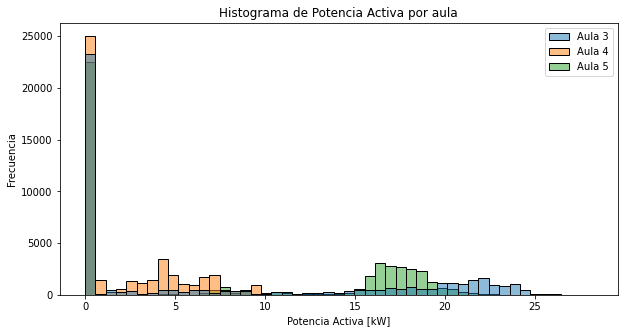

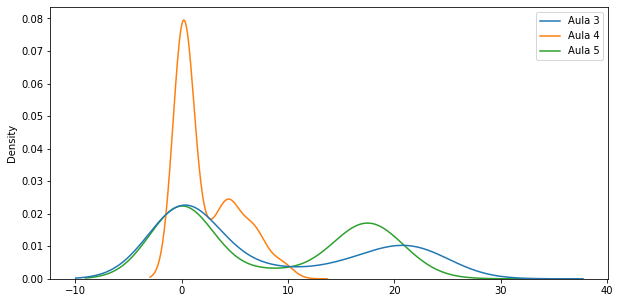

In [ ]:
%matplotlib inline
PA3 = abs(data['P31']+data['P32']+data['P33'])
PA4 = abs(data['P41']+data['P42']+data['P43'])
PA5 = abs(data['P51']+data['P52']+data['P53'])
P = pd.DataFrame([PA3,PA4,PA5],index = ['Aula 3','Aula 4', 'Aula 5']).T
plt.figure(figsize=(10,5))
sns.histplot(data = P)
plt.title('Histograma de Potencia Activa por aula')
plt.xlabel('Potencia Activa [kW]')
plt.ylabel('Frecuencia')

plt.figure(figsize=(10,5))
sns.kdeplot(data=P,bw_adjust=3)

#sns.kdeplot(data['Uso [kW]'],bw=0.5)



Text(0, 0.5, 'Densidad')

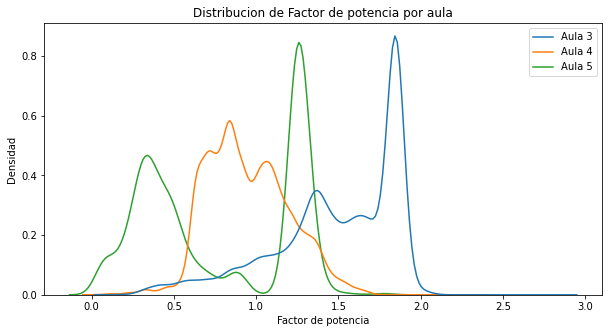

In [ ]:
FPA3 = abs(data['FP31']+data['FP32']+data['FP33'])
FPA4 = abs(data['FP41']+data['FP42']+data['FP43'])
FPA5 = abs(data['FP51']+data['FP52']+data['FP53'])
FP = pd.DataFrame([FPA3,FPA4,FPA5],index = ['Aula 3','Aula 4', 'Aula 5']).T
plt.figure(figsize=(10,5))
sns.kdeplot(data=FP,bw_adjust=1)
plt.title('Distribucion de Factor de potencia por aula')
plt.xlabel('Factor de potencia')
plt.ylabel('Densidad')



Text(0, 0.5, 'Densidad')

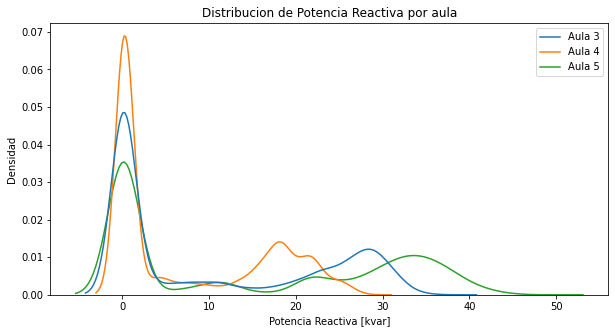

In [ ]:
QA3 = abs(data['Q31']+data['Q32']+data['Q33'])
QA4 = abs(data['Q41']+data['Q42']+data['Q43'])
QA5 = abs(data['Q51']+data['Q52']+data['Q53'])
Q = pd.DataFrame([QA3,QA4,QA5],index = ['Aula 3','Aula 4', 'Aula 5']).T
plt.figure(figsize=(10,5))
sns.kdeplot(data=Q,bw_adjust=1)
plt.title('Distribucion de Potencia Reactiva por aula')
plt.xlabel('Potencia Reactiva [kvar]')
plt.ylabel('Densidad')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


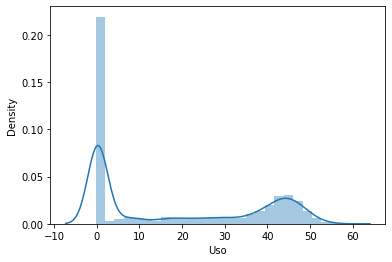

In [ ]:
sns.distplot(data['Uso'])

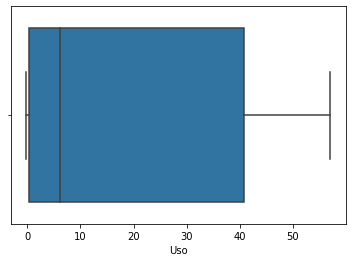

In [ ]:
sns.boxplot(data=data,x='Uso')

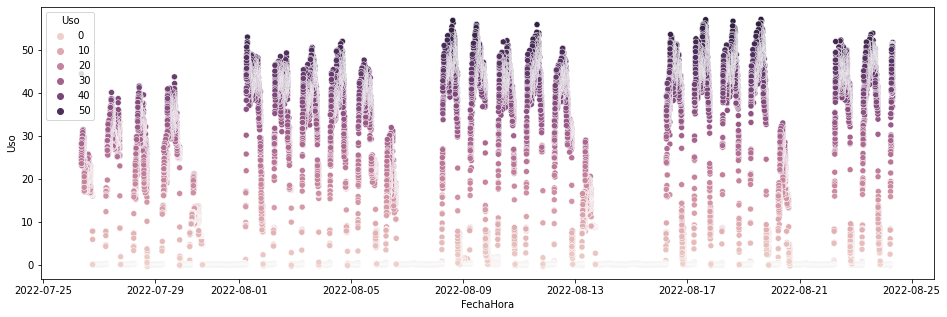

In [ ]:
plt.figure(figsize=(16,5))
splt = sns.scatterplot(data=data, x='FechaHora', y='Uso',hue='Uso')

<Figure size 720x360 with 0 Axes>

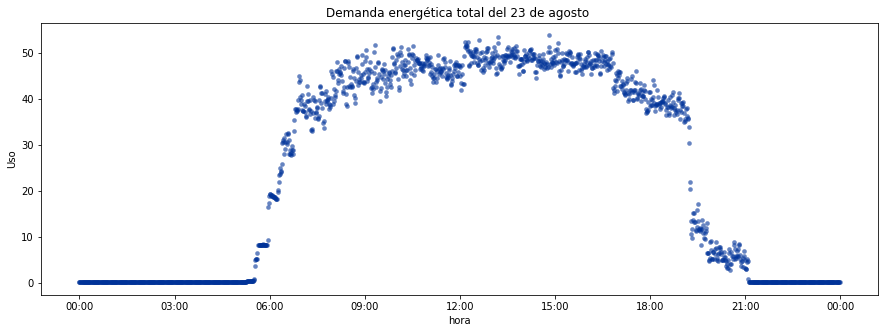

In [ ]:
plt.figure(figsize=(10,5))
pd1 = data[3381:4822]
ax=pd1.plot(x='FechaHora',y='Uso', kind="scatter" ,figsize=[15, 5], linewidth=0.1, alpha=0.6, color="#003399")

timeFmt = dates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(timeFmt)
plt.xlabel('hora')
plt.title('Demanda energética total del 23 de agosto ')
plt.show()


# Fraiming del proyecto
## Supervised learning approach
- Posibles Label:
  - Potencia Total
  - Uso
- Features: 
  - Potencia (activa, reactiva y aparente) y factor de potencia de los pisos 1,2 y 3 de las aulas A3, A4, A5
  - Potencia reactiva y corriente total
  - voltajes de línea 1 y 2 
  - fecha y hora.

In [ ]:
my_feature = 'PotenciaTotal'
my_label = 'Uso'

# Correlación entre las variables

In [ ]:
dataCorr = data.corr(method='pearson')
pd.DataFrame(dataCorr).style.background_gradient(cmap='coolwarm')

,Uso,ReactivaTotal,L1Voltage,L2Voltage,P31,S31,FP31,Q31,P32,S32,FP32,Q32,P33,S33,FP33,Q33,P41,S41,FP41,P42,S42,FP42,Q41,Q42,P43,S43,FP43,Q43,P51,S51,FP51,Q51,P52,S52,FP52,Q52,P53,S53,Q53,FP53,PotenciaTotal,Corriente
Uso,1.000000,-0.992889,-0.696334,-0.607313,-0.931640,0.933700,0.426790,-0.934644,-0.822972,0.825154,0.051918,-0.823002,-0.920904,0.919709,0.681365,-0.918721,-0.855816,0.856659,0.635850,-0.665916,0.935034,-0.121589,-0.856803,-0.934473,0.240787,0.830292,-0.806600,-0.837084,0.754429,0.840770,-0.330863,-0.840627,-0.934942,0.936189,0.885472,-0.936317,-0.933718,0.930164,-0.928209,0.903980,0.994937,0.994433
ReactivaTotal,-0.992889,1.000000,0.694636,0.607038,0.932831,-0.935256,-0.425393,0.936410,0.831572,-0.834089,-0.066279,0.832086,0.921642,-0.920798,-0.662883,0.920004,0.861623,-0.862318,-0.649773,0.647105,-0.960854,0.186019,0.862416,0.960467,-0.247101,-0.837851,0.801355,0.844688,-0.795423,-0.893371,0.375706,0.893243,0.910295,-0.912643,-0.854964,0.913536,0.921348,-0.917348,0.915174,-0.888220,-0.999815,-0.999585
L1Voltage,-0.696334,0.694636,1.000000,0.986410,0.647890,-0.654145,-0.319450,0.657632,0.677248,-0.675224,-0.117911,0.671032,0.648421,-0.642664,-0.460816,0.639375,0.592971,-0.596289,-0.397150,0.332426,-0.658193,0.151349,0.597759,0.658057,-0.267369,-0.558231,0.563239,0.569263,-0.618016,-0.613622,0.249229,0.613395,0.644023,-0.641315,-0.625047,0.639005,0.605808,-0.596033,0.591064,-0.589145,-0.696704,-0.705665
L2Voltage,-0.607313,0.607038,0.986410,1.000000,0.568384,-0.575164,-0.294105,0.578991,0.622638,-0.620391,-0.131548,0.616427,0.566356,-0.560117,-0.395082,0.556612,0.523747,-0.527407,-0.339420,0.266097,-0.578161,0.158552,0.529086,0.578101,-0.242040,-0.473887,0.485061,0.485420,-0.552737,-0.544021,0.235142,0.543822,0.555604,-0.552866,-0.536384,0.550611,0.509365,-0.498738,0.493375,-0.493322,-0.608839,-0.618646
P31,-0.931640,0.932831,0.647890,0.568384,1.000000,-0.999818,-0.593138,0.999549,0.774004,-0.776245,-0.097086,0.774167,0.810207,-0.809225,-0.618174,0.808421,0.757662,-0.758275,-0.601475,0.816115,-0.920009,0.293019,0.758390,0.919200,-0.240461,-0.713458,0.704319,0.721960,-0.737214,-0.808724,0.332978,0.808530,0.818695,-0.819982,-0.782242,0.820243,0.853857,-0.849580,0.847293,-0.826974,-0.933420,-0.933146
S31,0.933700,-0.935256,-0.654145,-0.575164,-0.999818,1.000000,0.590880,-0.999940,-0.778344,0.780526,0.099409,-0.778391,-0.813750,0.812533,0.618831,-0.811603,-0.760123,0.760904,0.601955,-0.808990,0.921903,-0.294314,-0.761101,-0.921108,0.242704,0.714689,-0.704674,-0.723022,0.741015,0.812746,-0.335362,-0.812553,-0.820246,0.821549,0.782524,-0.821818,-0.855464,0.850864,-0.848416,0.827917,0.935816,0.935807
FP31,0.426790,-0.425393,-0.319450,-0.294105,-0.593138,0.590880,1.000000,-0.589822,-0.442843,0.439071,0.540705,-0.435199,-0.323779,0.322607,0.528297,-0.322172,-0.329672,0.328491,0.553905,-0.526134,0.475507,-0.368615,-0.328285,-0.475171,0.131373,0.235009,-0.240250,-0.245985,0.379804,0.335252,0.013057,-0.335094,-0.314881,0.317213,0.396237,-0.318457,-0.317956,0.312916,-0.310258,0.392076,0.426153,0.428909
Q31,-0.934644,0.936410,0.657632,0.578991,0.999549,-0.999940,-0.589822,1.000000,0.780727,-0.782870,-0.100976,0.780702,0.815557,-0.814203,-0.619139,0.813200,0.761338,-0.762215,-0.602155,0.804764,-0.922790,0.295131,0.762459,0.922004,-0.243949,-0.715118,0.704626,0.723359,-0.743045,-0.814845,0.336596,0.814653,0.820886,-0.822197,-0.782480,0.822469,0.856090,-0.851300,0.848757,-0.828194,-0.936953,-0.937100
P32,-0.822972,0.831572,0.677248,0.622638,0.774004,-0.778344,-0.442843,0.780727,1.000000,-0.997395,-0.384032,0.993175,0.723447,-0.721827,-0.509471,0.720745,0.716173,-0.717558,-0.550368,0.423256,-0.827637,0.322761,0.718172,0.827938,-0.186507,-0.640566,0.595123,0.645632,-0.678917,-0.744597,0.379985,0.744554,0.684921,-0.691426,-0.630838,0.695282,0.688252,-0.680911,0.677138,-0.666296,-0.831516,-0.837433
S32,0.825154,-0.834089,-0.675224,-0.620391,-0.776245,0.780526,0.439071,-0.782870,-0.997395,1.000000,0.368457,-0.998984,-0.724243,0.722616,

### Grafico de autocorrelacion (ACF) para la variable uso
Los valores de Moran cercanos a +1 indican agrupamiento. La potencia demandada de un día depende mucho de la demanada de los días pasados. Esto justifica el uso de una RNN que está hecha para analizar datos secuenciales.

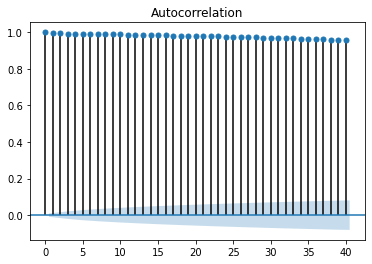

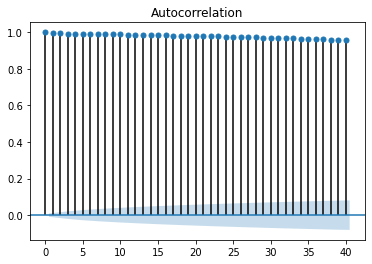

In [ ]:
data = data.set_index('FechaHora')
plot_acf(data.Uso, lags = 40)

## Apuntes
- Usando  **Potencia total** y **Uso** como etiquetas, los factores de potencia (FP) tienen por lo general *poco poder predictivo*, así que se podrían descartar como característica útil para el modelo.

- ReactivaTotal, P31, Q31, P33, Q33, Q42, P52, Q52, P53, Q53; P32,Q32,P41,Q41,Q43 y Q51  tienen una **correlación negativa** fuerte con Uso.
- S31,S33,S42,S52,S53,PotenciaTotal,Corriente tienen una **correlacion positiva** fuerte con Uso.

In [ ]:
for col in data.columns:
  if 'FP' in col:
    data.drop(col, axis=1, inplace=True)

# División del conjunto de entrenamiento, validación y prueba
- Las RNN necesitan datos i.i.d, pero la "unidad" de muestreo es cada secuencia (Cada ejemplo que tiene asociado una posición en el tiempo)

In [ ]:
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

def graficar_curva_de_perdida(epochs, mae):
  """Graficar curva de perdida vs las epochs"""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Median Absolute Error")

  plt.plot(epochs, mae, label="Loss")
  plt.legend()
  plt.ylim([mae.min()*0.97, mae.max()])
  plt.show()  


In [ ]:
#Normalizar y centralizar los datos
data_nc = minmax_norm(data)
data_nc = data_nc.sub(data_nc.mean(axis=0),axis=1)

# 70 train, 15 validation, 15 test
# Los ejemplos son seleccionados de forma aleatoria
train_set = data.sample(frac=0.7,random_state=0)
validation_set = data.sample(frac=0.15, random_state=0)
test_set = data.sample(frac=0.15,random_state=0)

# escoger conjuntos con una sola caracteristica para hacer la prediccion (por simplicidad de momento)
s_train_set =  pd.concat([train_set[my_feature] , train_set[my_label]],axis=1)
s_validation_set = pd.concat([validation_set[my_feature],validation_set[my_label]],axis=1)
s_test_set = pd.concat([test_set[my_feature],test_set[my_label]],axis=1)

# Modelo de *RNN* con tensorflow y keras
- Necesitamos una RNN many to one, en la que una entrada sea un vector de caracteristicas (un ejemplo) para una **FechaHora** determinada.
- ¿Las 27 features que se corresponden a P[aula|piso], Q[aula|piso],S[aula|piso] y FP[aula|piso] se pueden reducir a 3? (hacer embedding). 
- Dropout es otra tecnica para lidiar con el overfitting, Desactiva neuronas de forma aleatoria durante el entrenamiento para prevenir la codependencia de estas al estar conectadas
- Learning rate, momentum, SGD, error absoluto medio (MAE)

### Creacion del modelo

In [ ]:
modelo = Sequential()
modelo.add(LSTM(1,input_shape=(1,1),use_bias=True))
modelo.add(Dropout(0.2))
modelo.add(Dense(1))

### Compilación

In [ ]:
modelo.compile(loss='mae',optimizer='adam')
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1)                 12        
                                                                 
 dropout_5 (Dropout)         (None, 1)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

Epoch 1/300
313/313 [==============================] - 4s 5ms/step - loss: 18.5504 - val_loss: 17.6722
Epoch 2/300
313/313 [==============================] - 1s 3ms/step - loss: 18.0973 - val_loss: 17.6227
Epoch 3/300
313/313 [==============================] - 1s 3ms/step - loss: 18.0485 - val_loss: 17.5649
Epoch 4/300
313/313 [==============================] - 1s 3ms/step - loss: 17.9827 - val_loss: 17.4868
Epoch 5/300
313/313 [==============================] - 1s 4ms/step - loss: 17.8966 - val_loss: 17.3938
Epoch 6/300
313/313 [==============================] - 2s 6ms/step - loss: 17.7982 - val_loss: 17.2900
Epoch 7/300
313/313 [==============================] - 2s 5ms/step - loss: 17.6870 - val_loss: 17.1768
Epoch 8/300
313/313 [==============================] - 2s 5ms/step - loss: 17.5722 - val_loss: 17.0587
Epoch 9/300
313/313 [==============================] - 2s 6ms/step - loss: 17.4468 - val_loss: 16.9365
Epoch 10/300
313/313 [==============================] - 2s 5ms/step - los

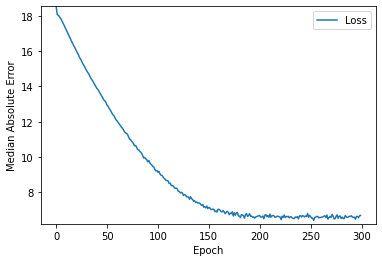

In [ ]:
historia=modelo.fit(s_train_set['PotenciaTotal'],s_train_set['Uso'],
                    epochs=300,
                    batch_size=100, 
                    validation_data=(s_validation_set['PotenciaTotal'],s_validation_set['Uso']),
                    shuffle=True)
epochs = historia.epoch
hist = pd.DataFrame(historia.history)
mae = hist['loss']
graficar_curva_de_perdida(epochs,mae)

### Predicción

In [ ]:
pre=modelo.predict(s_test_set['PotenciaTotal'])
pre = pd.DataFrame(pre)
s_test_set.insert(2,'UsoP',pre)

210/210 [==============================] - 0s 2ms/step


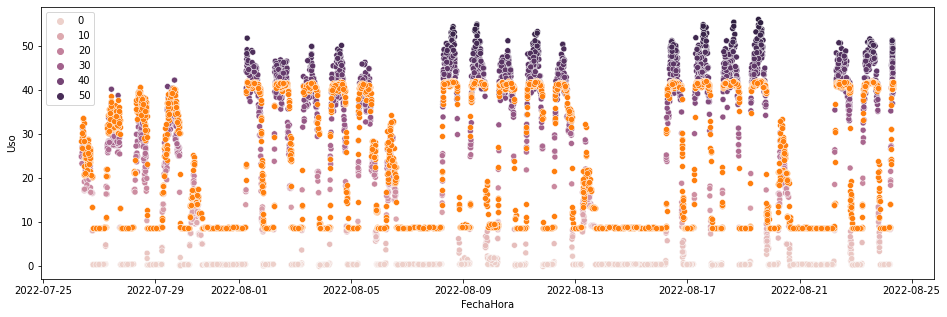

In [ ]:
plt.figure(figsize=(16,5))
s_test_set.sort_values(by='FechaHora',ascending=True)
splt = sns.scatterplot(data=s_test_set, x='FechaHora', y='Uso',hue='Uso')
splt = sns.scatterplot(data=s_test_set, x='FechaHora', y='UsoP')
